# MAIA Demo

#### Many of MAIA's experiments are available in the [experiment browser](https://multimodal-interpretability.csail.mit.edu/maia/experiment-browser/) ####

In [14]:
import os

import openai
from dotenv import load_dotenv

# Some imports require api key to be set ######
# Load environment variables
load_dotenv()

# Load OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.organization = os.getenv("OPENAI_ORGANIZATION")
###############################################


from maia_api import System, Tools
from utils.DatasetExemplars import DatasetExemplars
from utils.main_utils import generate_save_path
from utils.InterpAgent import InterpAgent
from utils.api_utils import str2image

<class 'str'>


Stable-Diffusion 3.5 requires access to run. You can request it here: https://huggingface.co/stabilityai/stable-diffusion-3.5-medium

In [8]:
# Login for access to sd-3.5
from huggingface_hub import login
login()

### Utils

In [2]:
# Plot the results from the experiment log
def plot_results_notebook(log_entry):
    if (log_entry['role'] == 'assistant'):
        print('\n\n*** MAIA: ***\n\n')  
    for item in log_entry['content']:
        if item['type'] == 'text':
            print(item['text'])
        elif item['type'] == 'image_url':
            display(str2image(item['image_url']['url'].split(',')[1]))

### Arguments

In [4]:
maia_model = 'gpt-4o-mini'
task = 'neuron_description'
n_exemplars = 15
model_name = "resnet152"
layer = "layer4"
neuron_num = 20
images_per_prompt = 1
path2save = '../results'
path2prompts = './prompts'
path2exemplars = './exemplars'
path2indices = './neuron_indices'
device = 1
text2image = 'sd'
debug = True

unit_config = {model_name: {layer: [neuron_num]}}

path2save = generate_save_path(path2save, maia_model, "test")
print(path2save)
os.makedirs(path2save, exist_ok=True)

../results/gpt-4o-mini/test


### Init

In [9]:
# Prompt needs to be created dynamically for bias_discovery so class label can be inserted
if task == "bias_discovery":
    create_bias_prompt(path2indices, path2prompts, str(neuron_num))

# Add API configuration
api = [
    (System, [System.call_neuron]),
    (Tools, [Tools.text2image, Tools.edit_images, Tools.dataset_exemplars, 
             Tools.display, Tools.describe_images, Tools.summarize_images])
]
maia = InterpAgent(
    model_name=maia_model,
    api=api,
    prompt_path=path2prompts,
    api_prompt_name="api.txt",
    user_prompt_name=f"user_{task}.txt",
    overload_prompt_name="final.txt",
    end_experiment_token="[FINAL]",
    max_round_count=15,
    debug=debug
)
if model_name == "synthetic":
    net_dissect = SyntheticExemplars(
        os.path.join(path2exemplars, model_name),
        path2save,
        layer
    )
    gt_label = retrieve_synth_label(layer, neuron_num)
    system = SyntheticSystem(neuron_num, gt_label, layer, device)
else:
    net_dissect = DatasetExemplars(
        path2exemplars,
        n_exemplars,
        path2save,
        unit_config
    )
    system = System(model_name, layer, neuron_num, net_dissect.thresholds, device)

tools = Tools(
    path2save,
    device,
    maia,
    system,
    net_dissect,
    images_per_prompt=images_per_prompt,
    text2image_model_name=text2image,
    image2text_model_name=maia_model
)

print("HTML path: ", tools.html_path)

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

../results/gpt-4o-mini/test/experiment_0.html


## Maia's api and user prompts

In [11]:
plot_results_notebook(maia.experiment_log[0])
plot_results_notebook(maia.experiment_log[1])



*** Experiment Execution: ***


Class System:
    A Python class containing the vision model and the specific neuron to interact with.
    
    Attributes
    ----------
    neuron_num : int
        The unit number of the neuron.
    layer : string
        The name of the layer where the neuron is located.
    model_name : string
        The name of the vision model.
    model : nn.Module
        The loaded PyTorch model.
    
    Methods
    -------
    call_neuron(image_list: List[torch.Tensor]) -> Tuple[List[int], List[str]]
        Returns the neuron activation for each image in the input image_list as well as the original image (encoded into a Base64 string).

    def call_neuron(self, image_list: List[torch.Tensor]) -> Tuple[List[float], List[str]]:
        The function returns the neuron's maximum activation value (in int format) for each of the images in the list as well as the original image (encoded into a Base64 string).
        
        Parameters
        ----------
     

## Experiment

In [12]:
maia.run_experiment(system, tools, save_html=True)

```python
   # Start by testing a general concept like "dogs" to see how the neuron reacts to related images.
   prompt_list = ["a dog standing on the grass", 
                  "a dog running through a field", 
                  "a dog playing fetch in a park"]
   images = tools.text2image(prompt_list)
   activation_list, image_list = system.call_neuron(images)
   for activation, image in zip(activation_list, image_list):
       tools.display(image, f"Activation: {activation}")
```
```python
# Start by testing a general concept like "dogs" to see how the neuron reacts to related images.
prompt_list = ["a dog standing on the grass", 
               "a dog running through a field", 
               "a dog playing fetch in a park"]
images = tools.text2image(prompt_list)
activation_list, image_list = system.call_neuron(images)
for activation, image in zip(activation_list, image_list):
    tools.display(image, f"Activation: {activation}")
```
[HYPOTHESIS LIST]: 
Hypothesis 1: The neuron is 

KeyboardInterrupt: 



*** MAIA: ***


```python
   # Start by testing a general concept like "dogs" to see how the neuron reacts to related images.
   prompt_list = ["a dog standing on the grass", 
                  "a dog running through a field", 
                  "a dog playing fetch in a park"]
   images = tools.text2image(prompt_list)
   activation_list, image_list = system.call_neuron(images)
   for activation, image in zip(activation_list, image_list):
       tools.display(image, f"Activation: {activation}")
```


*** Experiment Execution: ***




Standard Error:
Traceback (most recent call last):
  File "/data/scratch/jake/maia/utils/ExperimentEnvironment.py", line 59, in execute_experiment
    exec(compile(code, 'code', 'exec'), globals(), self.experiment_vars)
  File "code", line 2
    prompt_list = ["a dog standing on the grass",
    ^
IndentationError: unexpected indent
unexpected indent (code, line 2)


*** MAIA: ***


```python
# Start by testing a general concept like "dogs" to see how the

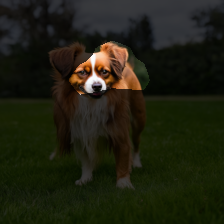

Activation: 4.804593086242676


*** Experiment Execution: ***




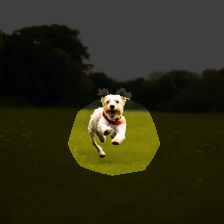

Activation: 6.730825424194336


*** Experiment Execution: ***




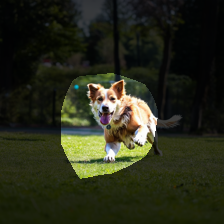

Activation: 7.480730056762695


*** MAIA: ***


[HYPOTHESIS LIST]: 
Hypothesis 1: The neuron is selective for images of dogs in playful or active scenarios, such as running or playing fetch. 

Now, let's explore the concept of dogs further by testing a specific type of dog activity, like "dogs playing fetch," to see how that influences activation.

[CODE]:
```python
# Test more specific scenarios of dogs in action.
prompt_list = ["a dog playing fetch with a ball", 
               "a dog retrieving a stick", 
               "a dog jumping to catch a frisbee"]
images = tools.text2image(prompt_list)
activation_list, image_list = system.call_neuron(images)
for activation, image in zip(activation_list, image_list):
    tools.display(image, f"Activation: {activation}")
```


*** Experiment Execution: ***




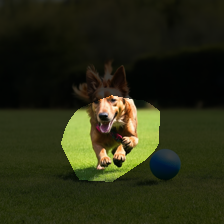

Activation: 8.208612442016602


*** Experiment Execution: ***




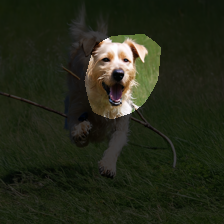

Activation: 6.110042572021484


*** Experiment Execution: ***




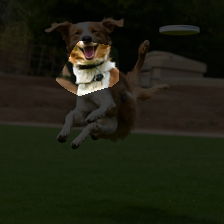

Activation: 5.211401462554932


*** MAIA: ***


[HYPOTHESIS LIST]: 
Hypothesis 1: The neuron is selective for images of dogs in playful or active scenarios, such as running or playing fetch.
Hypothesis 2: The neuron specifically activates more for images of dogs retrieving balls than for other activities, indicating a strong association with fetch-related actions.

Now, let's further explore the concept of "dogs" by testing different dog breeds and their activities to see if the neuron has a preference for specific breeds or characteristics.

[CODE]:
```python
# Test various dog breeds engaged in similar playful activities.
prompt_list = ["a Golden Retriever running in a field", 
               "a Beagle playing with a toy", 
               "a German Shepherd jumping over a fence"]
images = tools.text2image(prompt_list)
activation_list, image_list = system.call_neuron(images)
for activation, image in zip(activation_list, image_list):
    tools.display(image, f"Activation: {activation}"

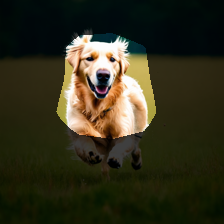

Activation: 6.487490177154541


*** Experiment Execution: ***




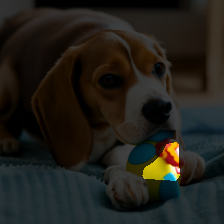

Activation: 4.200533866882324


*** Experiment Execution: ***




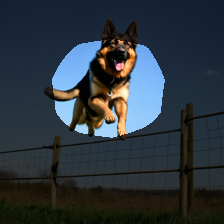

Activation: 10.860976219177246


*** MAIA: ***


[HYPOTHESIS LIST]: 
Hypothesis 1: The neuron is selective for images of dogs in playful or active scenarios, such as running or playing fetch.
Hypothesis 2: The neuron specifically activates more for images of dogs retrieving balls than for other activities, indicating a strong association with fetch-related actions.
Hypothesis 3: The neuron shows a strong activation for images of specific dog breeds, particularly when engaging in active behaviors (e.g., jumping).

Since the activation for the German Shepherd jumping over a fence is relatively high, let's further investigate how different dog activities impact neuron activation across a varied set of playful scenarios, including some non-breed-specific activities.

[CODE]:
```python
# Test various non-breed-specific dog activities to see if playfulness influences activations.
prompt_list = ["a dog chasing a butterfly", 
               "a dog playing in the water", 
               "a dog 

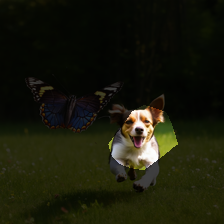

Activation: 6.024782180786133


*** Experiment Execution: ***




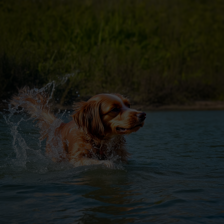

Activation: 3.5705606937408447


*** Experiment Execution: ***




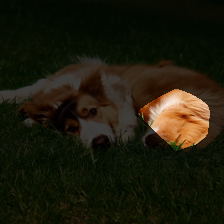

Activation: 5.831966400146484


In [15]:
# Plot the results from the experiment log
for log_entry in maia.experiment_log[2:]:
    plot_results_notebook(log_entry)